In [1]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def display(string, n_symb_in_row=100):
    i = 0
    while i < len(string):
        print(string[i : i+n_symb_in_row]) 
        i += n_symb_in_row

In [3]:
nclt_root = "/home/docker_opr/Datasets/OpenPlaceRecognition/NCLT_preprocessed"
train_df = pd.read_csv(os.path.join(nclt_root, "train.csv")) 

In [4]:
tracks = [i for i in os.listdir(nclt_root) if os.path.isdir(os.path.join(nclt_root, i))]
df_dict = {}
for track in tracks:
    track_path = os.path.join(nclt_root, track)
    df_dict[track] = {f"cam{n}" : pd.read_csv(os.path.join(track_path, f"descriptions_Cam{n}.csv")) for n in range(1, 6)}

In [5]:
ind = 820
row = train_df.iloc[ind, :]
track = row["track"]
imagename = row["image"]

track_path = os.path.join(nclt_root, track)

print(f"track: {track}")
print(f"imagename: {imagename}")

track: 2012-02-18
imagename: 1329600420409174


In [6]:
def vis_images(ind):
    row = train_df.iloc[ind, :]
    track = row["track"]
    imagename = row["image"]

    track_path = os.path.join(nclt_root, track)

    print(f"track: {track}")
    print(f"imagename: {imagename}")
    
    plt.figure(figsize=(20, 8))

    for n in range(1, 6):
        image_path = os.path.join(track_path, "images_small", f"Cam{n}", f"{imagename}.png")
        mask_path = os.path.join(track_path, "segmentation_masks_small", f"Cam{n}", f"{imagename}.png")
        
        cam_df = descriptions = df_dict[track][f"cam{n}"]
        text = cam_df[cam_df["path"] == f"{imagename}.png"]["description"].values[0]
        
        plt.subplot(2, 5, n)
        plt.imshow(Image.open(image_path))
        
        plt.subplot(2, 5, 5 + n)
        plt.imshow(Image.open(mask_path))
        
        # plt.subplot(3, 5, 10 + n)
        # plt.text(0, 0, text)
        # print("=========")
        # print(f"cam {n}")
        # print("=========")
        # display(text)
        
    # for n in range(1, 6):    
    #     text = cam_df[cam_df["path"] == f"{imagename}.png"]["description"].values[0]
    #     print("=========")
    #     print(f"cam {n}")
    #     print("=========")
    #     display(text)

track: 2012-02-18
imagename: 1329600420409174


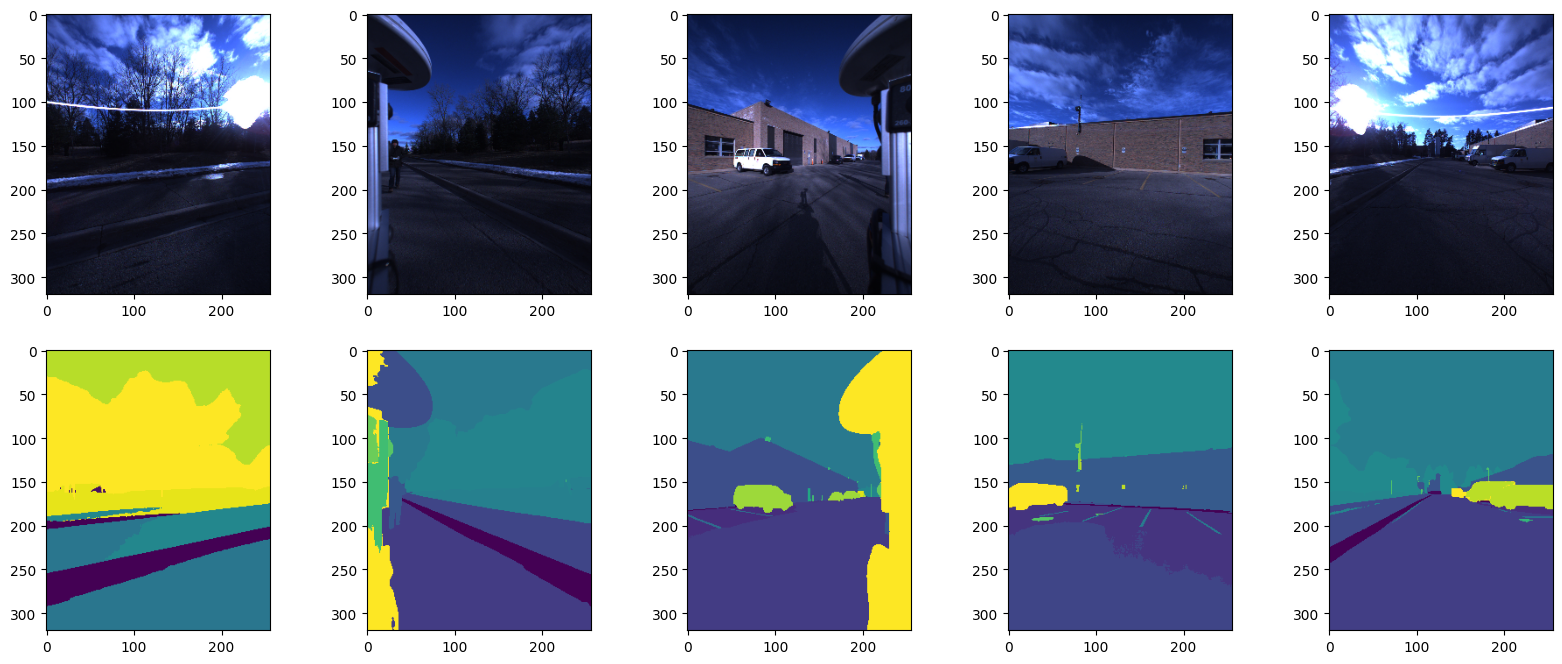

In [7]:
vis_images(820)

track: 2012-03-31
imagename: 1333220907345976


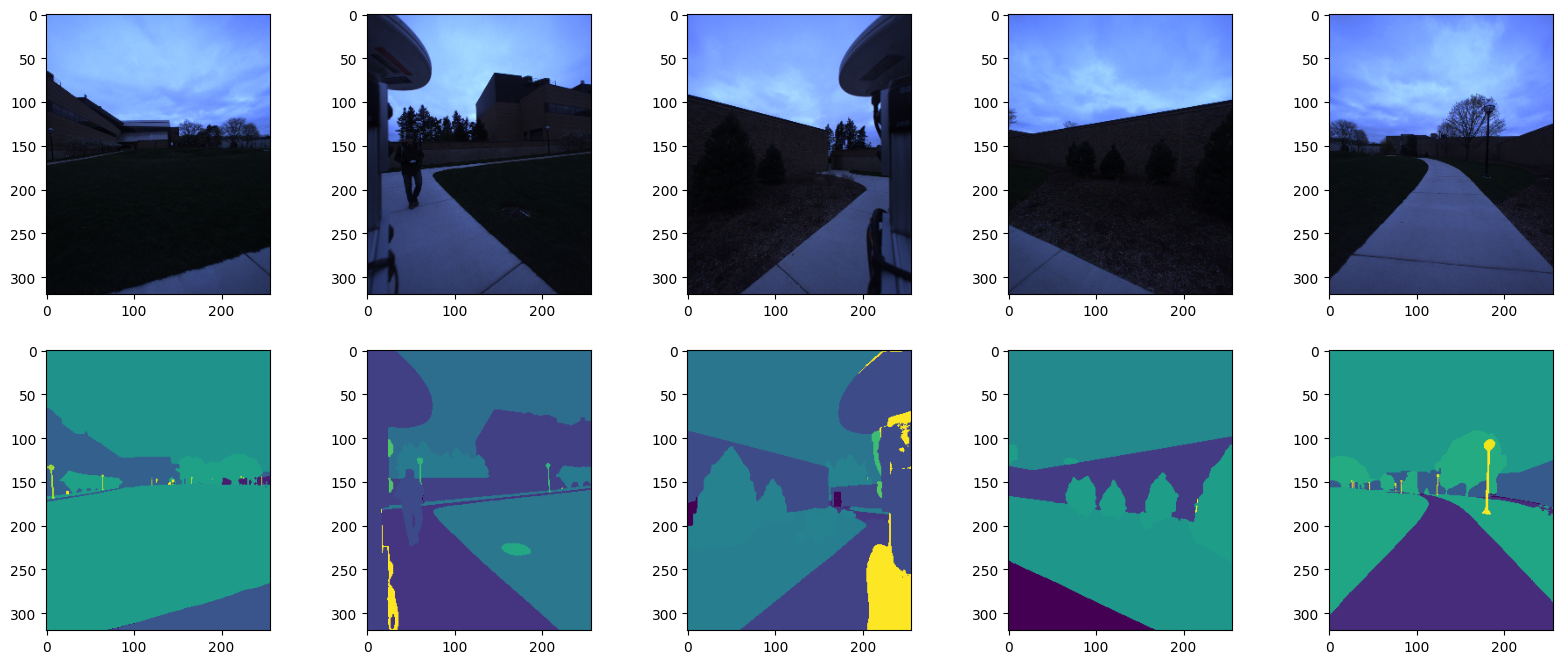

In [8]:
vis_images(1300)

track: 2012-05-26
imagename: 1338075493781677


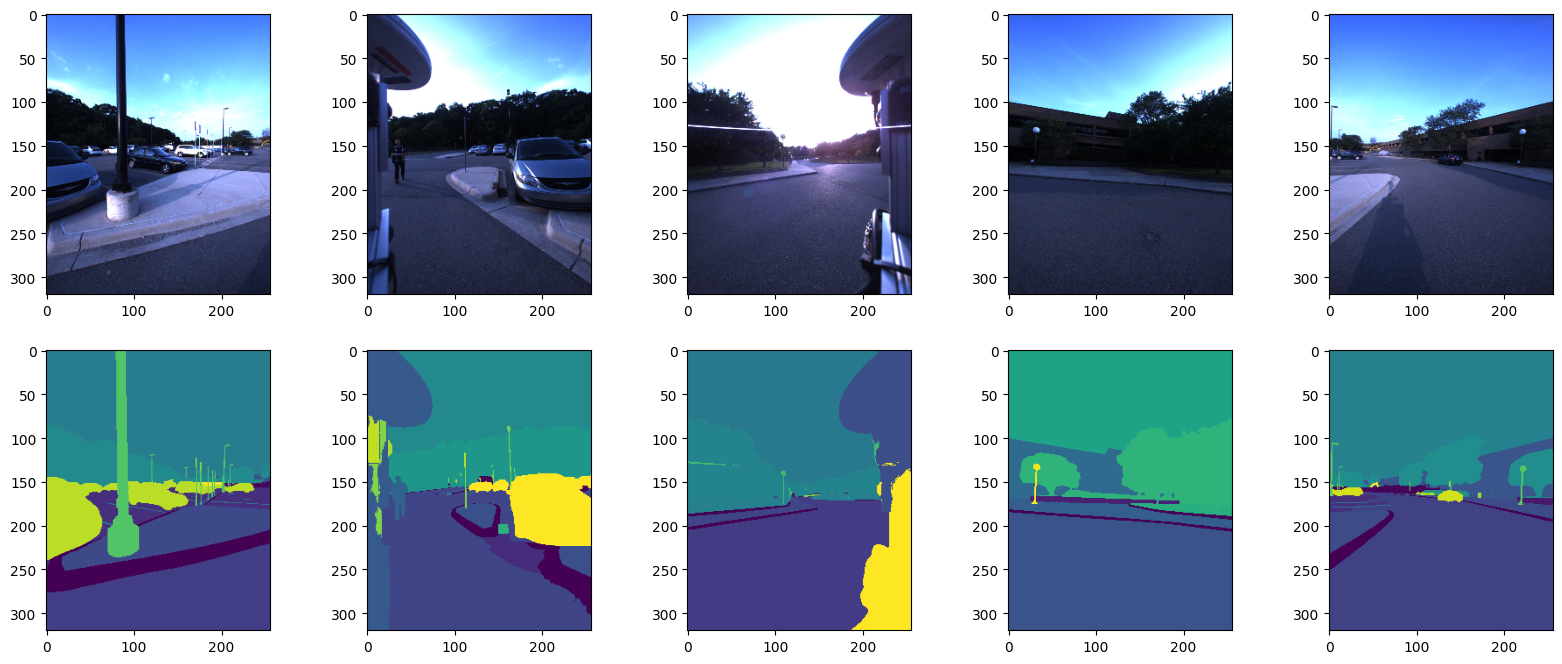

In [9]:
vis_images(1420)

track: 2012-08-04
imagename: 1344082346670848


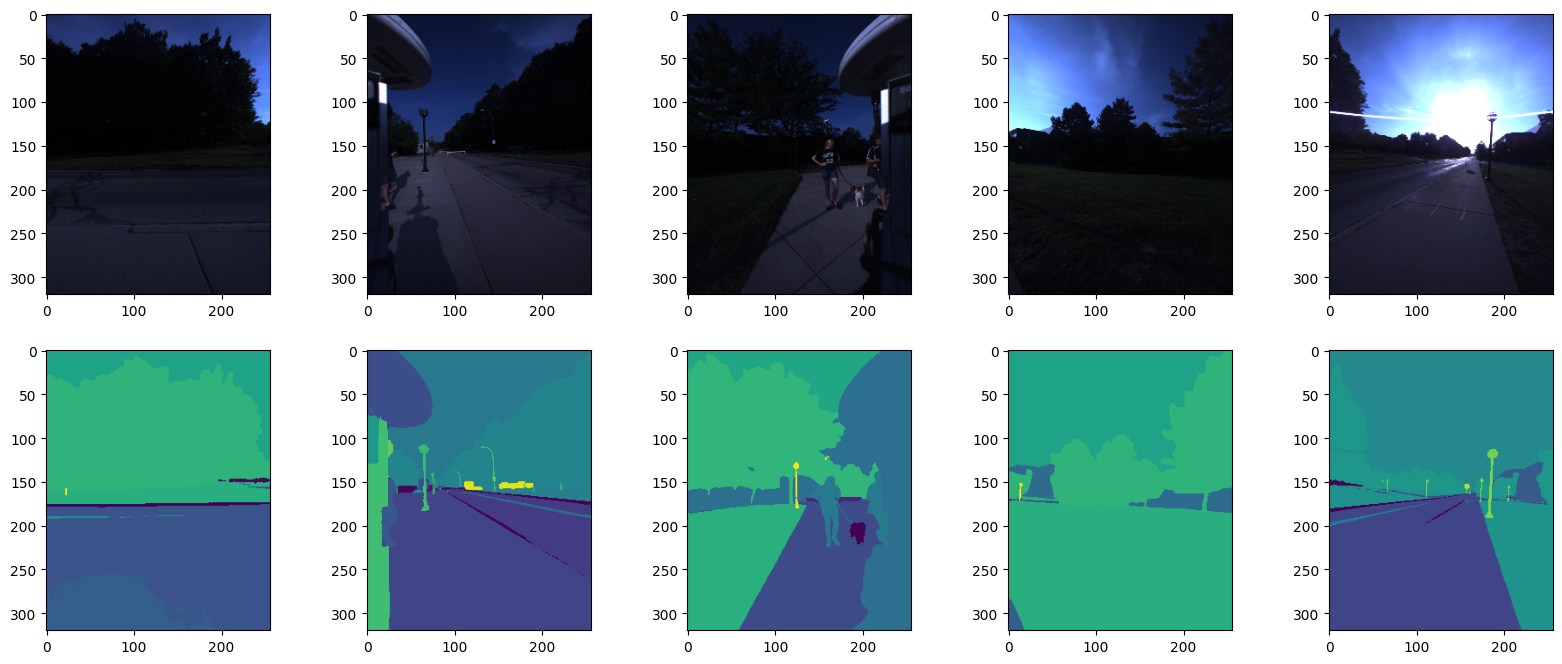

In [10]:
vis_images(1700)

track: 2012-08-04
imagename: 1344086254900520


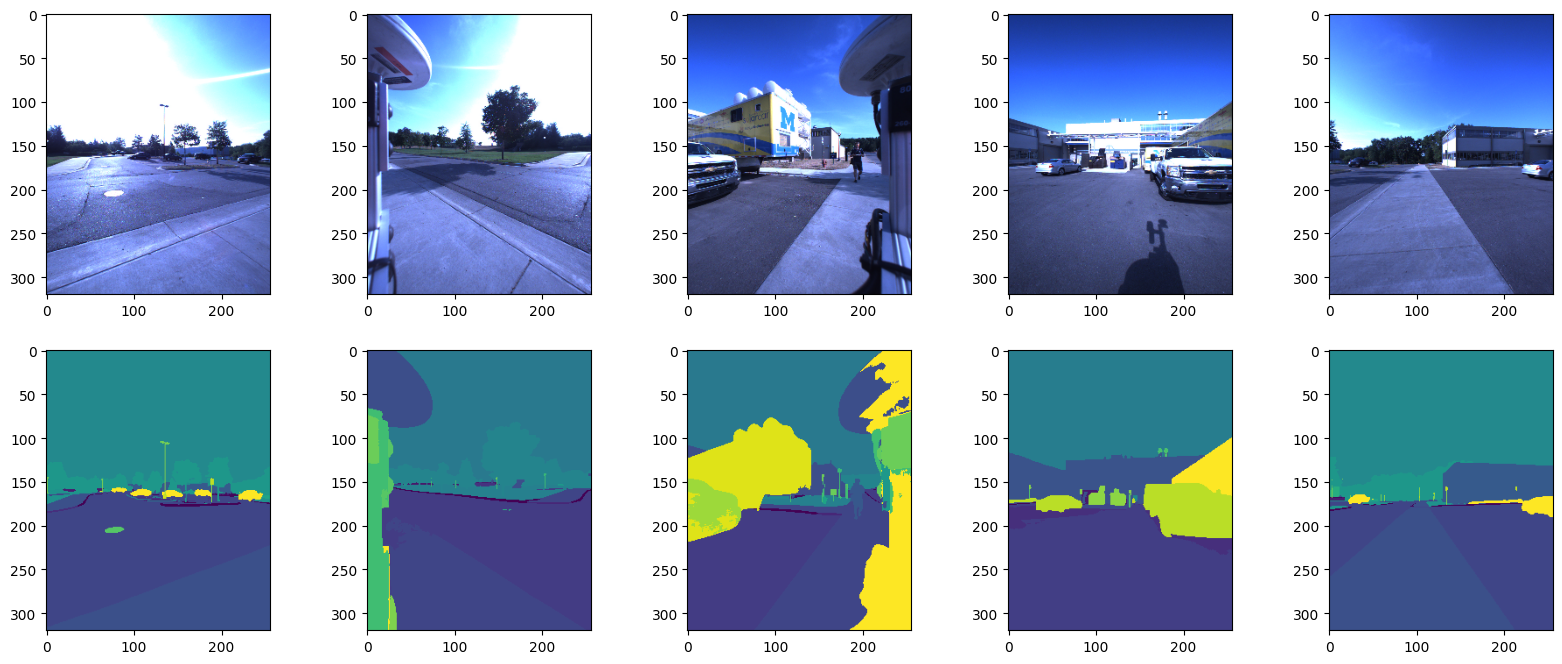

In [11]:
vis_images(1850)

track: 2012-10-28
imagename: 1351448840529869


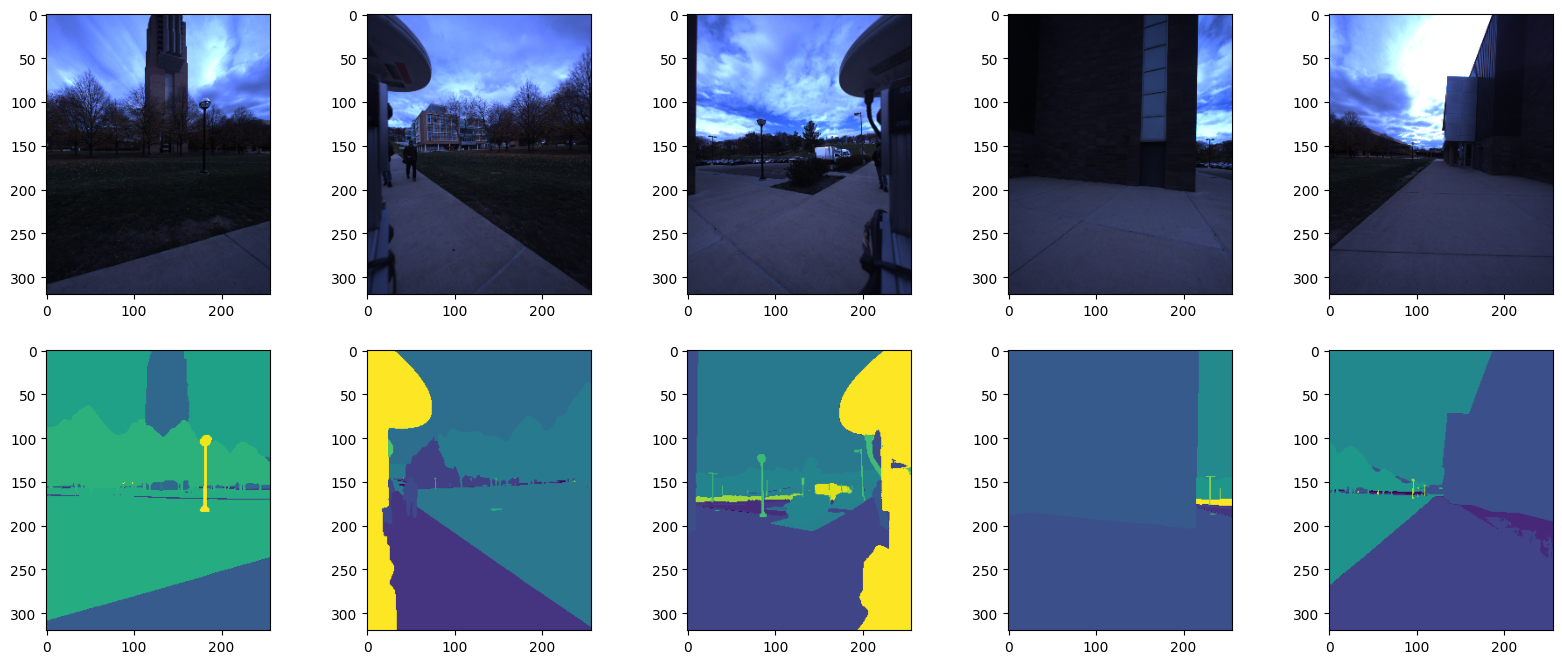

In [12]:
vis_images(1940)

track: 2012-11-04
imagename: 1352040372831437


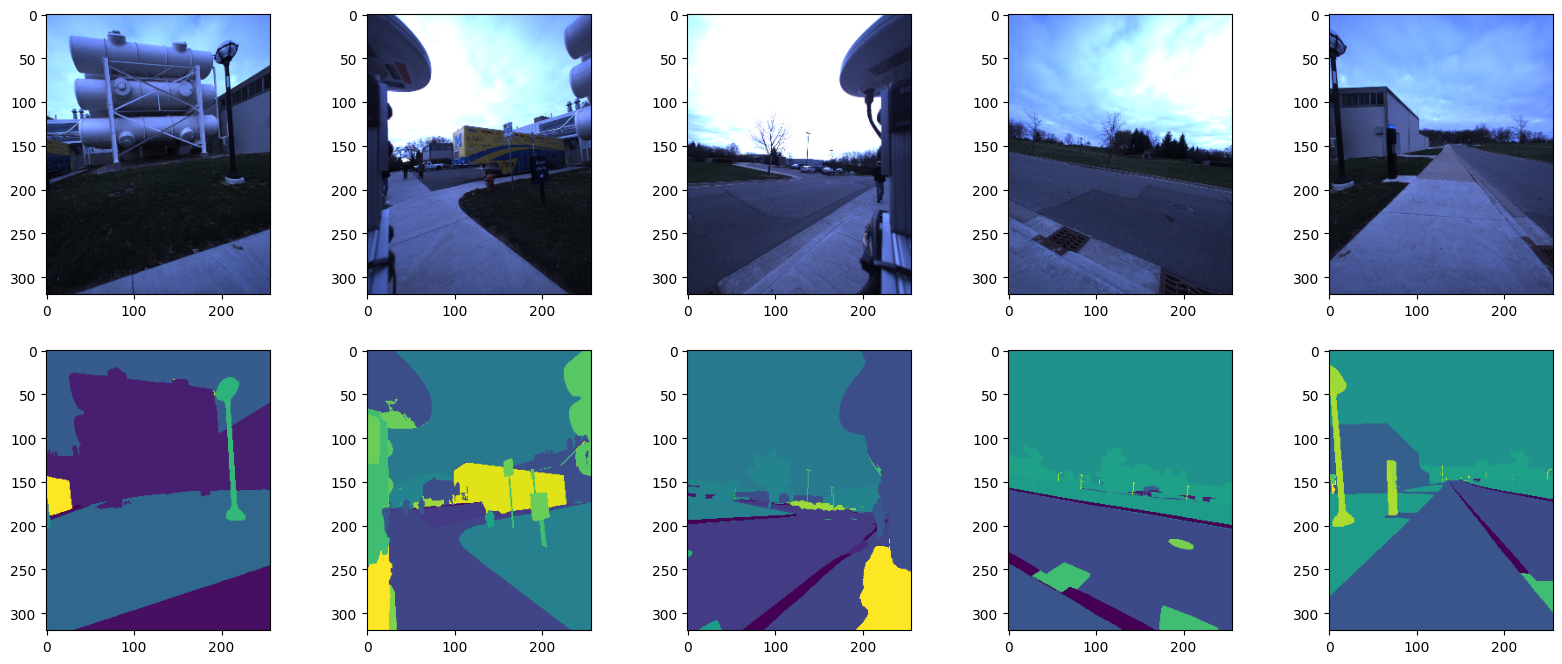

In [13]:
vis_images(2140)